# Mouse Project

## Preprocessing

In [13]:
from scipy.io import loadmat
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
#Import Data
y = loadmat("Data/Zero_Maze/608034_409/Day_1/Trial_001_0/binned_behavior.mat")
y = y["binned_behavior"][0]

X = loadmat("Data/Zero_Maze/608034_409/Day_1/Trial_001_0/binned_zscore.mat")
X = X["binned_zscore"]

In [15]:
print(np.shape(y))
print(np.shape(X))

(6300,)
(6300, 110)


In [16]:
df = pd.DataFrame(X)

## Basic Neural Network

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [18]:
model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

In [19]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
val_index = int(len(x_train)/3)
x_val = x_train[:val_index]
partial_x_train = x_train[val_index:]
y_val = y_train[:val_index]
partial_y_train = y_train[val_index:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=150,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/150
23/23 [==============================] - 2s 24ms/step - loss: 0.5882 - accuracy: 0.7282 - val_loss: 0.5946 - val_accuracy: 0.7238
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 0.5010 - accuracy: 0.7619 - val_loss: 0.5182 - val_accuracy: 0.7463
Epoch 3/150
23/23 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.7898 - val_loss: 0.4522 - val_accuracy: 0.7884
Epoch 4/150
23/23 [==============================] - 0s 7ms/step - loss: 0.3774 - accuracy: 0.8204 - val_loss: 0.4047 - val_accuracy: 0.8000
Epoch 5/150
23/23 [==============================] - 0s 8ms/step - loss: 0.3373 - accuracy: 0.8473 - val_loss: 0.3622 - val_accuracy: 0.8354
Epoch 6/150
23/23 [==============================] - 0s 7ms/step - loss: 0.3074 - accuracy: 0.8704 - val_loss: 0.3308 - val_accuracy: 0.8517
Epoch 7/150
23/23 [==============================] - 0s 8ms/step - loss: 0.2788 - accuracy: 0.8864 - val_loss: 0.3073 - val_accuracy: 0.8660
Epoch 8/150


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

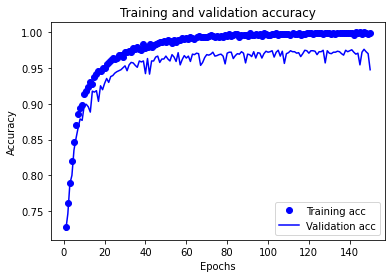

In [25]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

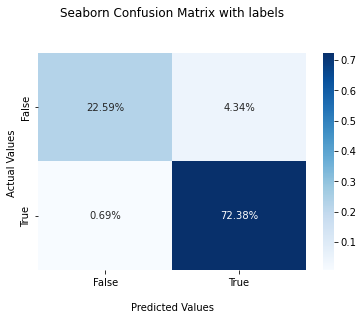

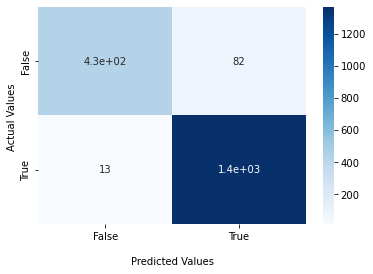

In [38]:
# see how these are numbers between 0 and 1? 
model.predict(x_test) # prob of successes (survival)
np.round(model.predict(x_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(x_test),0)

# confusion matrix
cf_matrix = confusion_matrix(y_test, preds)


ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


ax = sns.heatmap(cf_matrix, annot=True, 
            cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()